In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db_filename = 'dinofunworld-1.db'
conn = sqlite3.connect(db_filename)
cursor = conn.cursor()

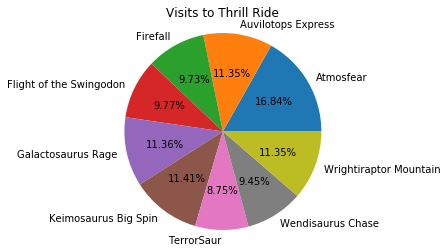

In [9]:
# Make a Pie Chart of the Visits to Thrill Ride attractions.

cursor.execute("SELECT Name, COUNT(*) FROM attraction, checkin WHERE Category LIKE '%Thrill Rides%' AND attraction.AttractionID=checkin.attraction GROUP BY Name")
Thrill_Rides=cursor.fetchall()

RideStats = pd.DataFrame.from_records(Thrill_Rides, columns=['Name', 'Value'])

plt.pie(RideStats['Value'], labels=rideStats['Name'], shadow=False, autopct='%.2f%%')
plt.title('Visits to Thrill Ride')
plt.axis('equal')

plt.show()

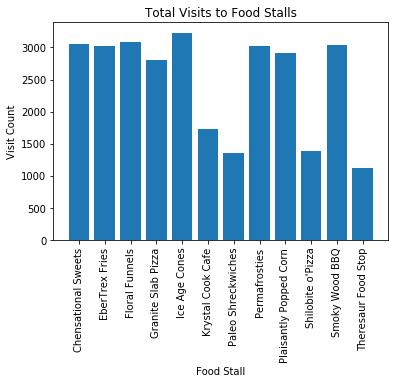

In [19]:
# Make a bar chart of total Visits to food stalls. 

cursor.execute("SELECT Name, COUNT(*) FROM attraction, checkin WHERE Category LIKE '%Food%' AND attraction.AttractionID=checkin.attraction GROUP BY Name")
foodStalls=cursor.fetchall()

foodStats = pd.DataFrame.from_records(foodStalls, columns=['Name', 'Value'])

plt.bar(foodStats['Name'],foodStats['Value'])
plt.xticks(foodStats['Name'], rotation=90)
plt.title('Total Visits to Food Stalls')
plt.xlabel('Food Stall')
plt.ylabel('Visit Count')

plt.show()

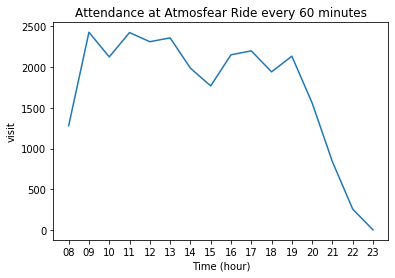

In [21]:
# Make a line chart of attendance at Atmosfear every five minutes. 

cursor.execute("SELECT substr(timestamp,12,2) AS Hour,COUNT(*) FROM checkin WHERE attraction='8' GROUP BY Hour ORDER BY Hour")
Hour=cursor.fetchall()
timeStats = pd.DataFrame.from_records(Hour,columns=['Hour','number'])


visit= timeStats['number']
time = timeStats['Hour']

plt.plot(time, visit)
plt.title('Attendance at Atmosfear Ride every 60 minutes')
plt.xlabel('Time (hour)')
plt.ylabel('visit')

plt.show()

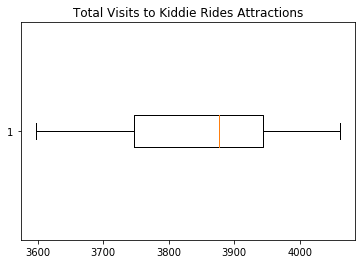

In [3]:
# Make a box plot of total visits to rides in the Kiddie Rides category.

cursor.execute("SELECT name, COUNT(*) FROM checkin, attraction WHERE checkin.attraction = attraction.attractionID AND Category LIKE 'Kiddie Rides%' GROUP BY name")
KiddieRides= cursor.fetchall()

rideStats=pd.DataFrame.from_records(KiddieRides, columns=['Name', 'Visits'])

plt.boxplot(rideStats['Visits'], vert=False)
plt.title('Total Visits to Kiddie Rides Attractions')

plt.show()